In [1]:
import numpy as np

import pandas as pd
import os, json
path = os.getcwd() + '/summaries_part/'
jsons = os.listdir(path)


# dict_list = []
# for fname in jsons:
#     try:
#         with open(path + fname) as f:
#             dict_summary = json.load(f)
#             dict_list.append(dict_summary)
#     except:
#         continue

# df = pd.DataFrame(dict_list)

# with open(os.getcwd() + '/summary/all_summary.9.json', 'w', encoding = 'utf-8') as fout:
#     json.dump(dict_list, fout)
    
with open(os.getcwd() + '/summary/all_summary.9.json') as fout:
    dict_list = json.load(fout)
    
df = pd.DataFrame(dict_list)

In [2]:
measure_cat = {'adele.sparse', 'mrlasso.sparse'}
mtype = 'l2.'
measures = [mtype + _ for _ in measure_cat]
measures += ['eta']
agg_dict = dict()
for key in measures:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['m', 'n', 's', 'outlier.dist', 'eta.pre'], as_index=False).agg(agg_dict)

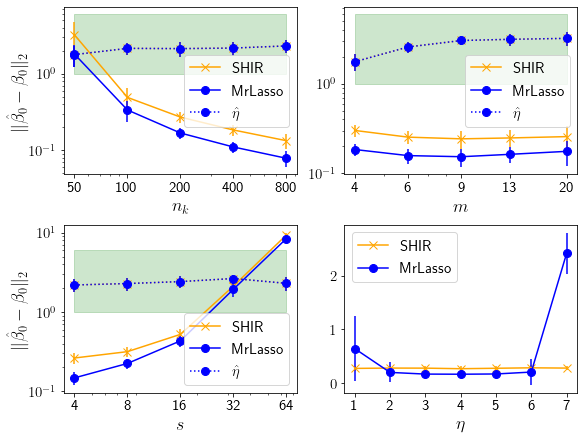

In [3]:
from plot import get_plot2, get_plot
fig, ax = get_plot(result, mtype)
fig.savefig(os.getcwd() + '/plots/' + mtype + 'sim.pdf')

In [4]:
measure_cat = {'adele.sparse', 'mrlasso.sparse'}
mtype = 'error.'
measures = [mtype + _ for _ in measure_cat]
# for measure in measures:
#     df[measure] += - 0.5 ** 2 
agg_dict = dict()
for key in measures:
    agg_dict[key] = ['mean', 'std']
result = df.groupby(['m', 'n', 's', 'outlier.dist', 'eta.pre'], as_index=False).agg(agg_dict)

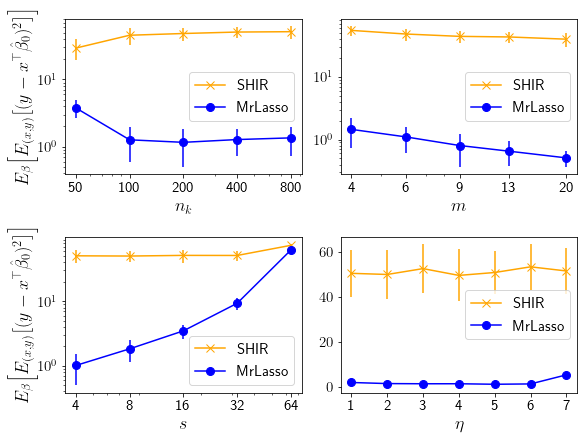

In [5]:
fig, ax = get_plot(result, mtype)
fig.savefig(os.getcwd() + '/plots/' + mtype + 'sim.pdf')